In [1]:
import pandas as pd
import numpy as np

DATA

In [2]:
titere = pd.read_csv('data/alferdez_tweets.csv', delimiter=',', header=None)
ladrona = pd.read_csv('data/CFKArgentina_tweets.csv', delimiter=',', header=None)
gato = pd.read_csv('data/mauriciomacri_tweets.csv', delimiter=',', header=None)
heidi = pd.read_csv('data/mariuvidal_tweets.csv', delimiter=',', header=None)

titere.columns = ['user', 'tweet_id','date','favs','rt','tweet']
ladrona.columns = ['user', 'tweet_id','date','favs','rt','tweet']
gato.columns = ['user', 'tweet_id','date','favs','rt','tweet']
heidi.columns = ['user', 'tweet_id','date','favs','rt','tweet']

In [3]:
gato.dtypes

user        object
tweet_id     int64
date        object
favs         int64
rt           int64
tweet       object
dtype: object

In [4]:
gato.sample(5)

,user,tweet_id,date,favs,rt,tweet
1080,Mauricio Macri,1076205232231800833,2018-12-21 19:58:16,2312,467,Hoy participamos del acto de entrega de atribu...
1247,Mauricio Macri,1044690880408571905,2018-09-25 20:51:29,2443,721,En vivo: el Presidente expone ante la 73° Asam...
775,Mauricio Macri,1133135706719703040,2019-05-27 22:19:39,5341,1294,La propuesta para 2019 va a permitir que todos...
850,Mauricio Macri,1119959096118206464,2019-04-21 13:40:31,11607,2497,Conmocionado por las noticias de los horribles...
2818,Mauricio Macri,756336730844913665,2016-07-22 03:55:03,2162,591,"""Ahorro hasta el último mango para ponerlo en ..."


In [5]:
data = [titere, ladrona, gato, heidi]
pol = ['Fernandez','Fernandez de Kirchner','Macri','Vidal']

CORPUS

In [6]:
corpus = gato.loc[:,['user','date','tweet']].append(ladrona.loc[:,['user','date','tweet']])

TOKENS

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
import re
from nltk.corpus import stopwords

In [273]:
stopwords_sp = stopwords.words('spanish') + ['https', 'co']

In [274]:
def removal(text):
    text = re.sub(r'(\d|\$|\%|\+)', '', text.lower())
    return re.sub(r'\d+', '', text)

In [275]:
vectorizer = CountVectorizer(stop_words = stopwords_sp, lowercase = True, strip_accents='unicode', preprocessor=removal)

In [276]:
tokens = vectorizer.fit_transform(corpus.tweet)

In [277]:
words = vectorizer.get_feature_names()

In [278]:
vectors = pd.DataFrame(tokens.todense(), columns=words, index=[f'{user}' for user in corpus.user])

In [279]:
vectors.insert(0,'date', corpus.date.values)

In [280]:
# vectors.to_csv("tokens/vectors.pkl", index=False )

EDA

In [281]:
import seaborn as sns
import matplotlib.pyplot as plt

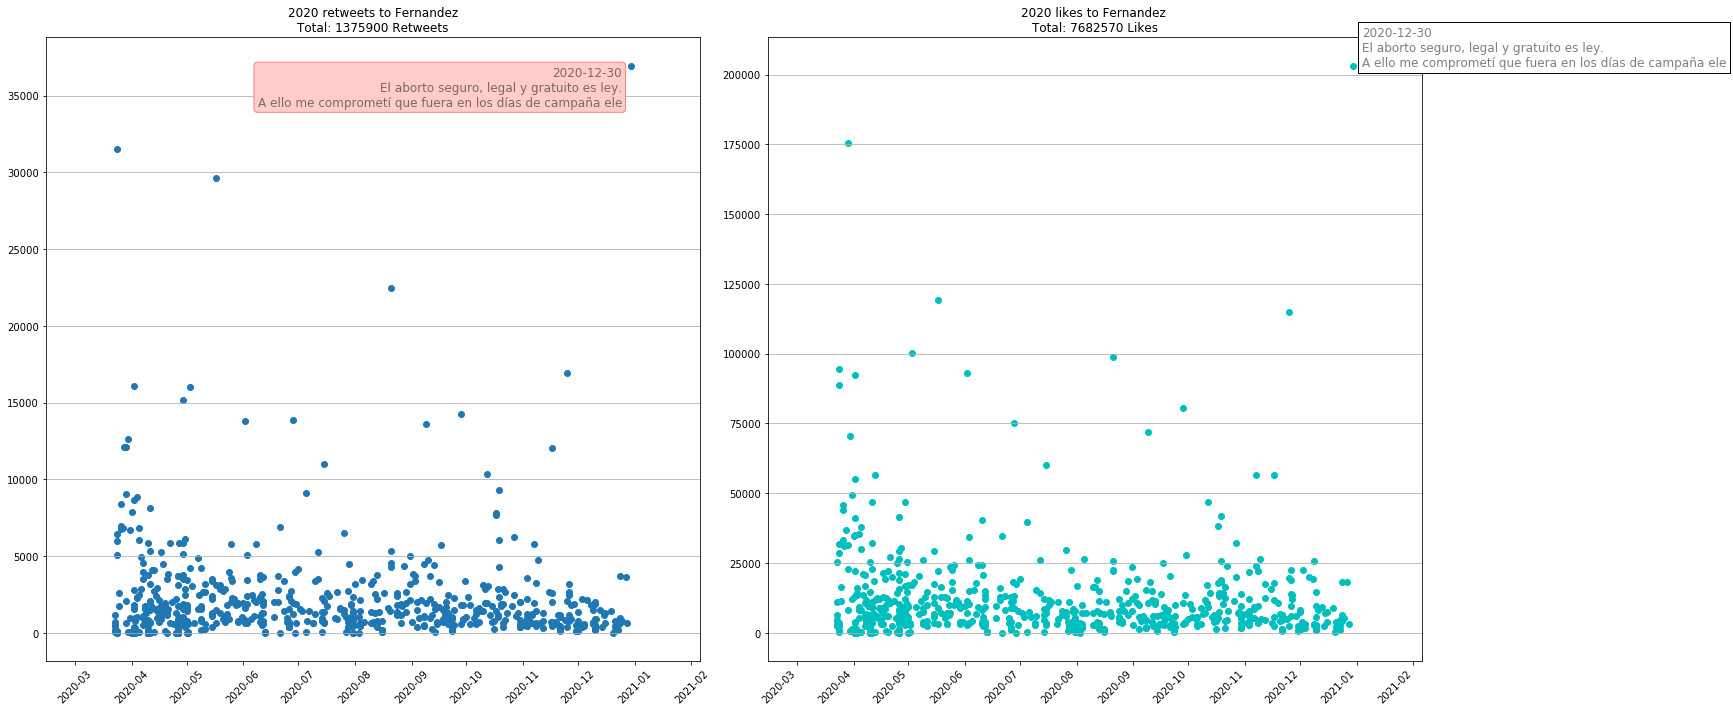

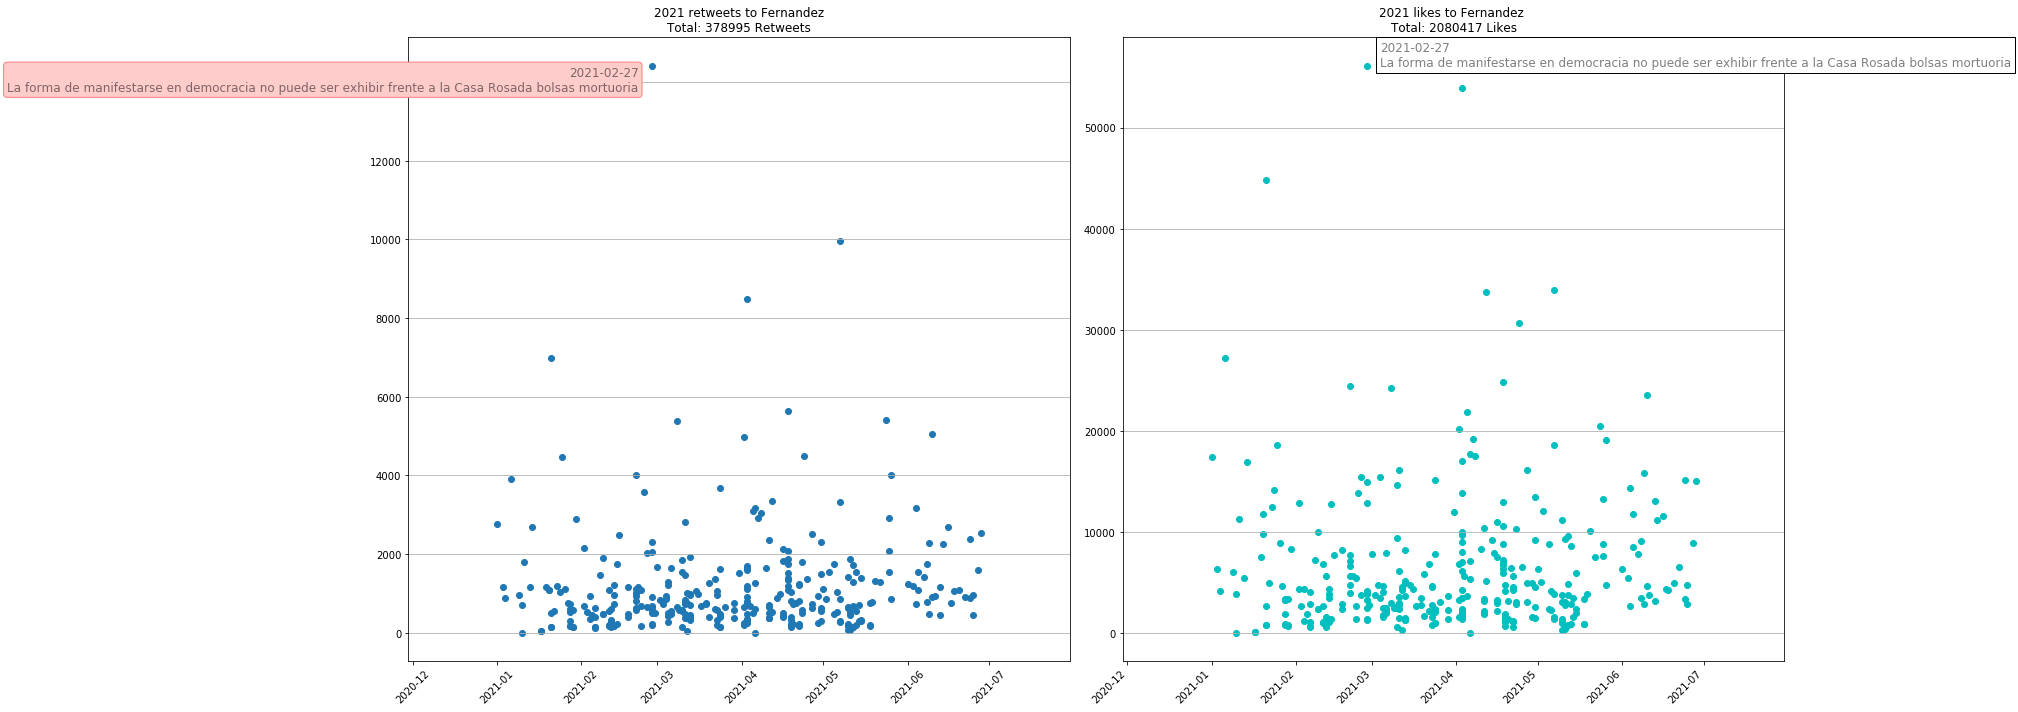

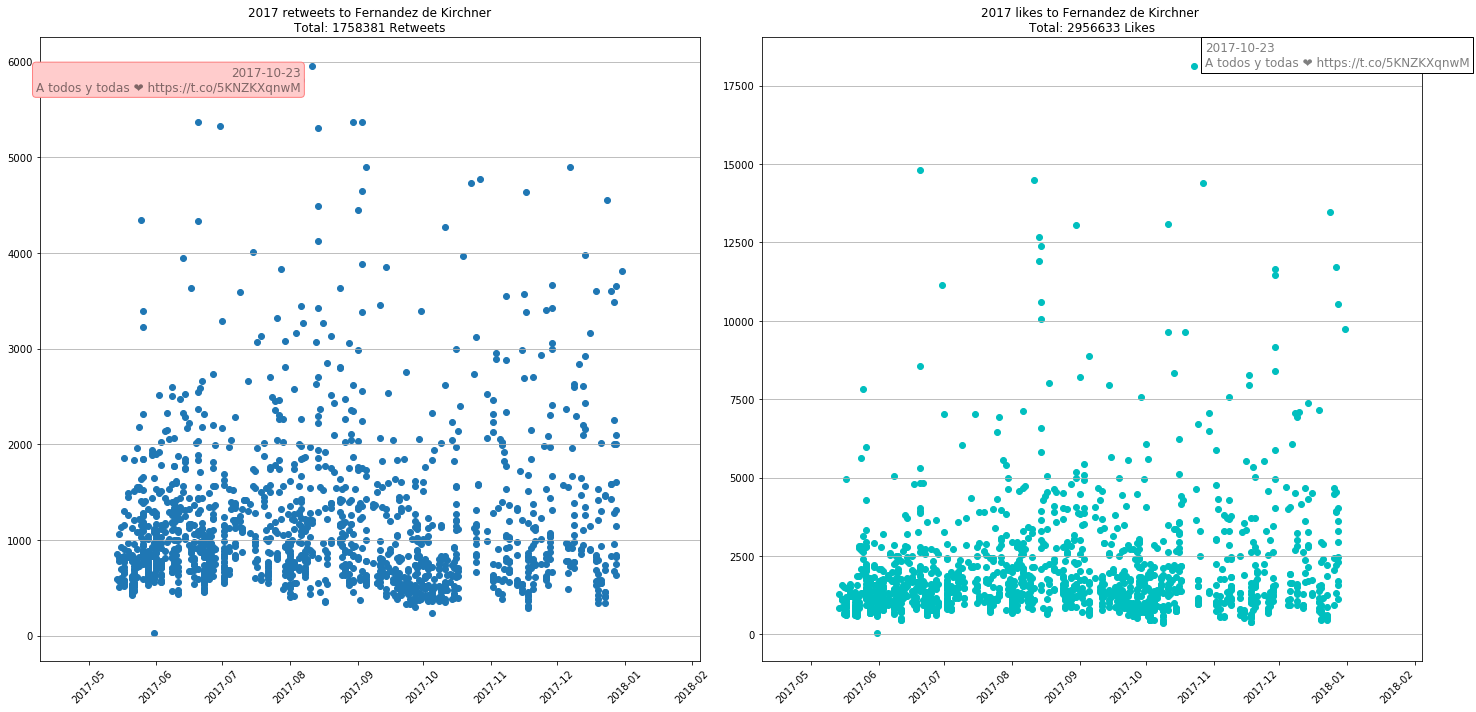

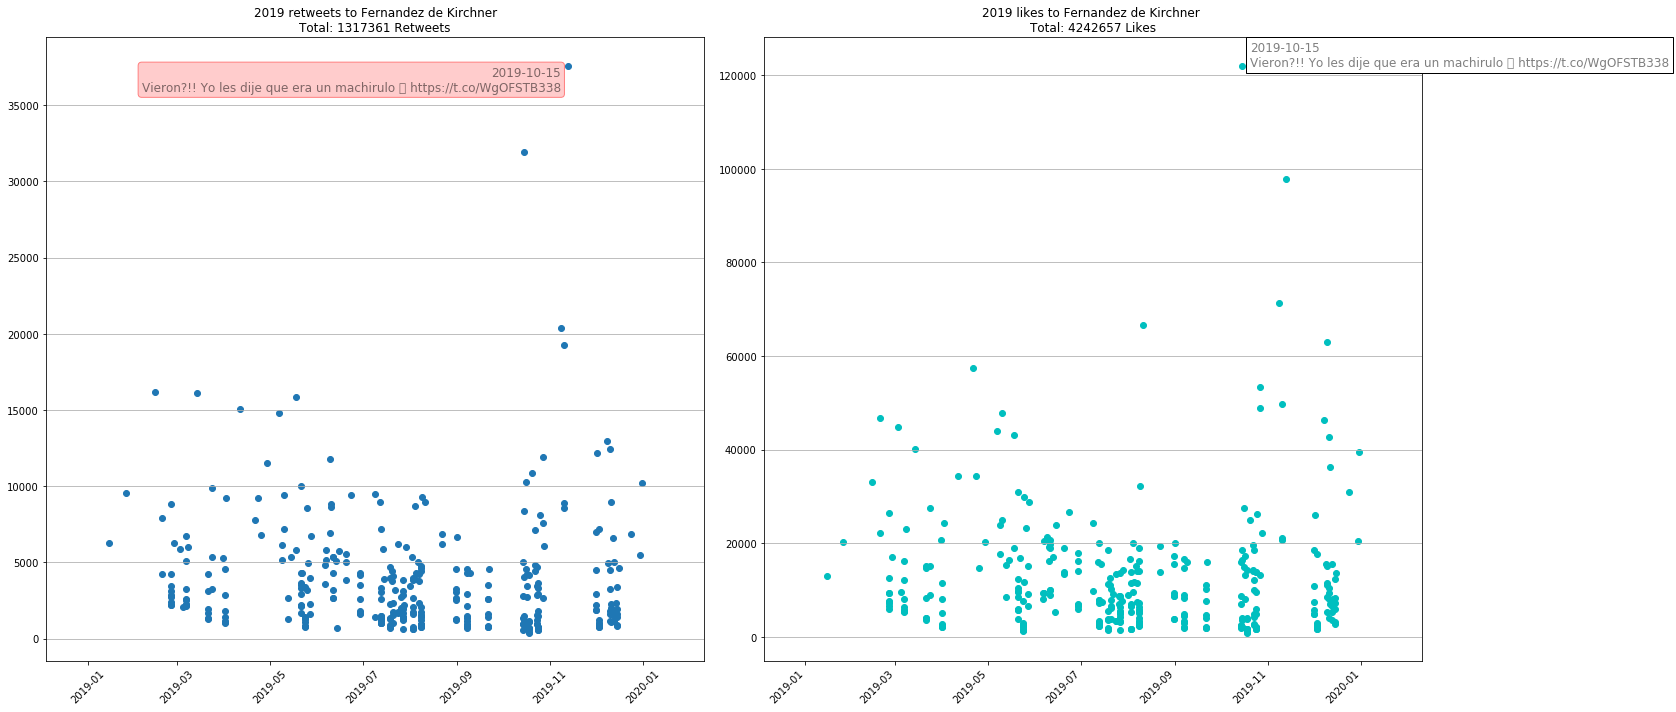

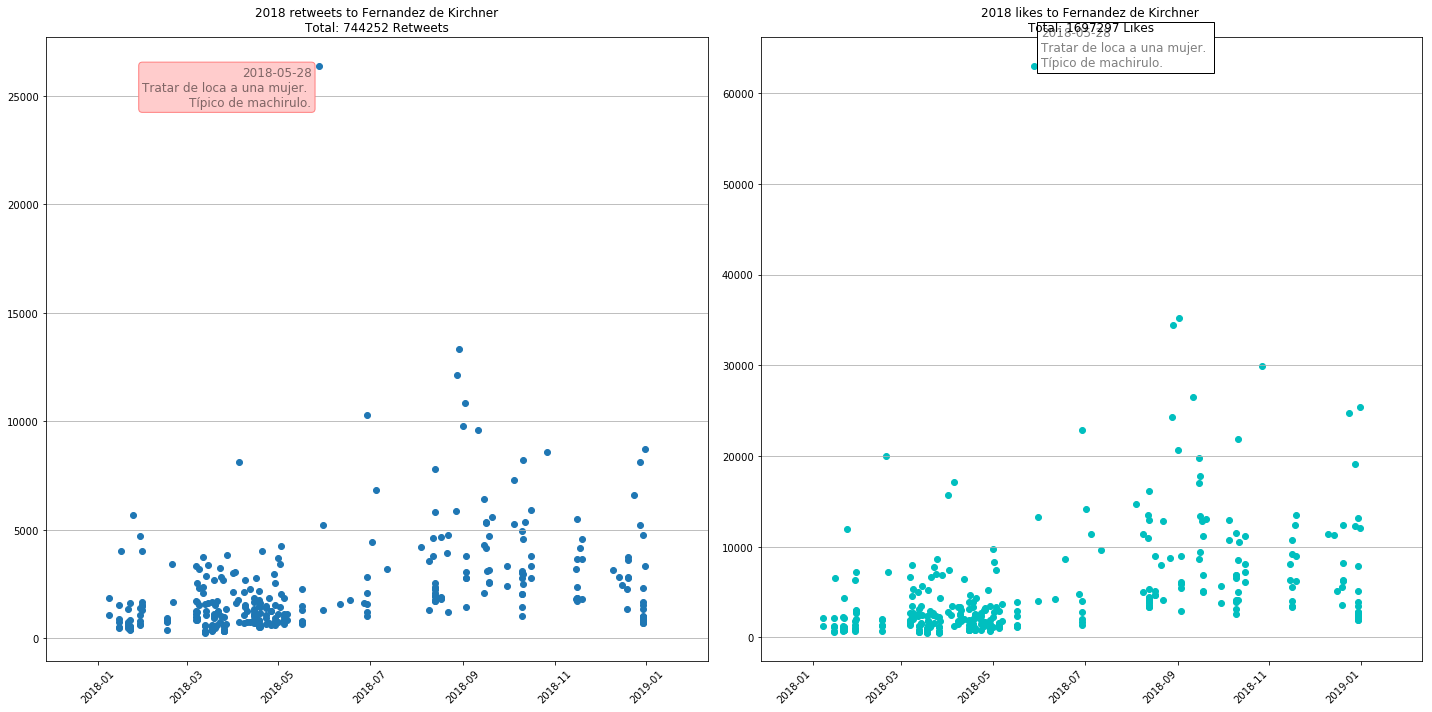

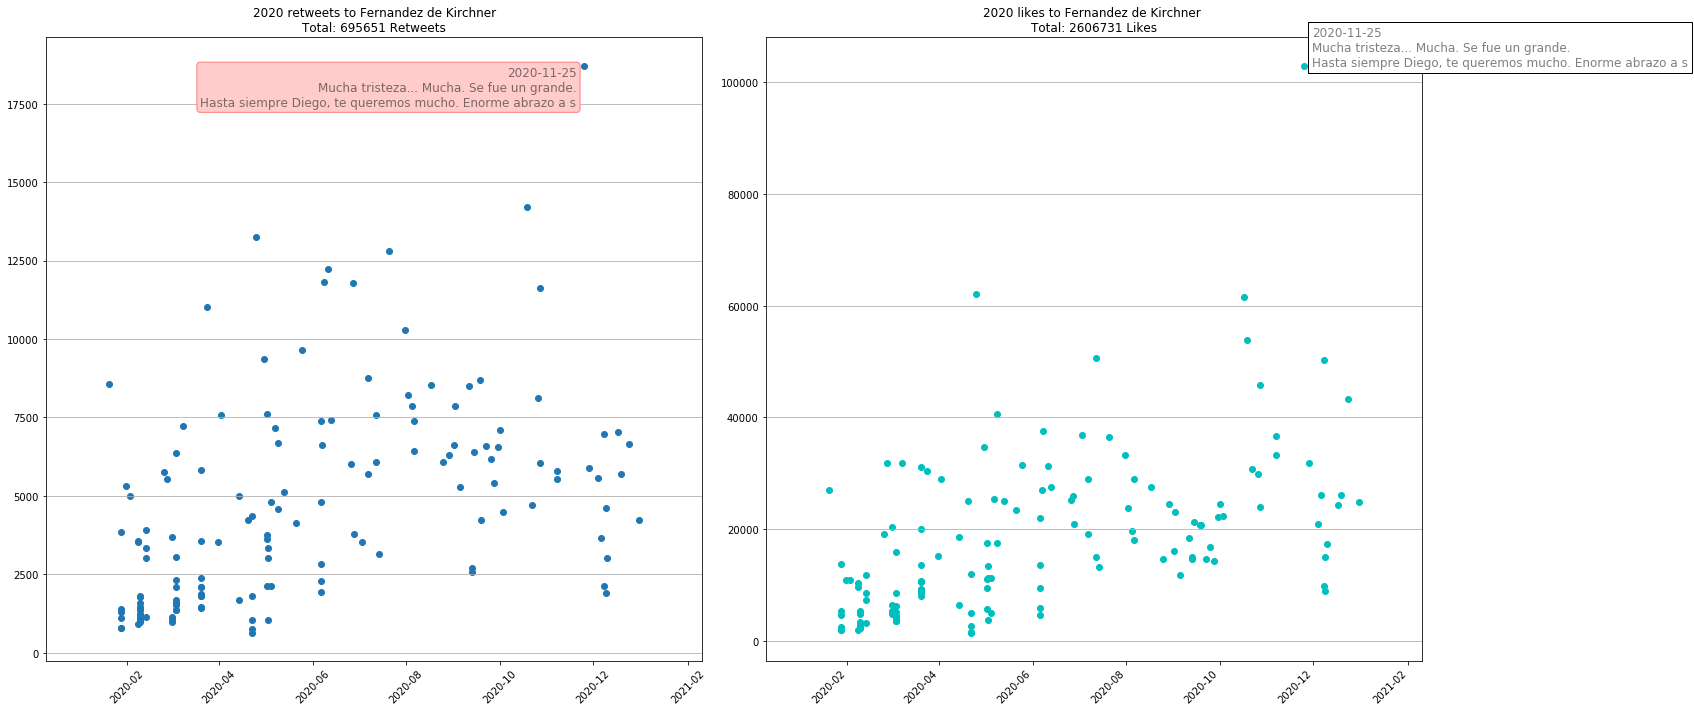

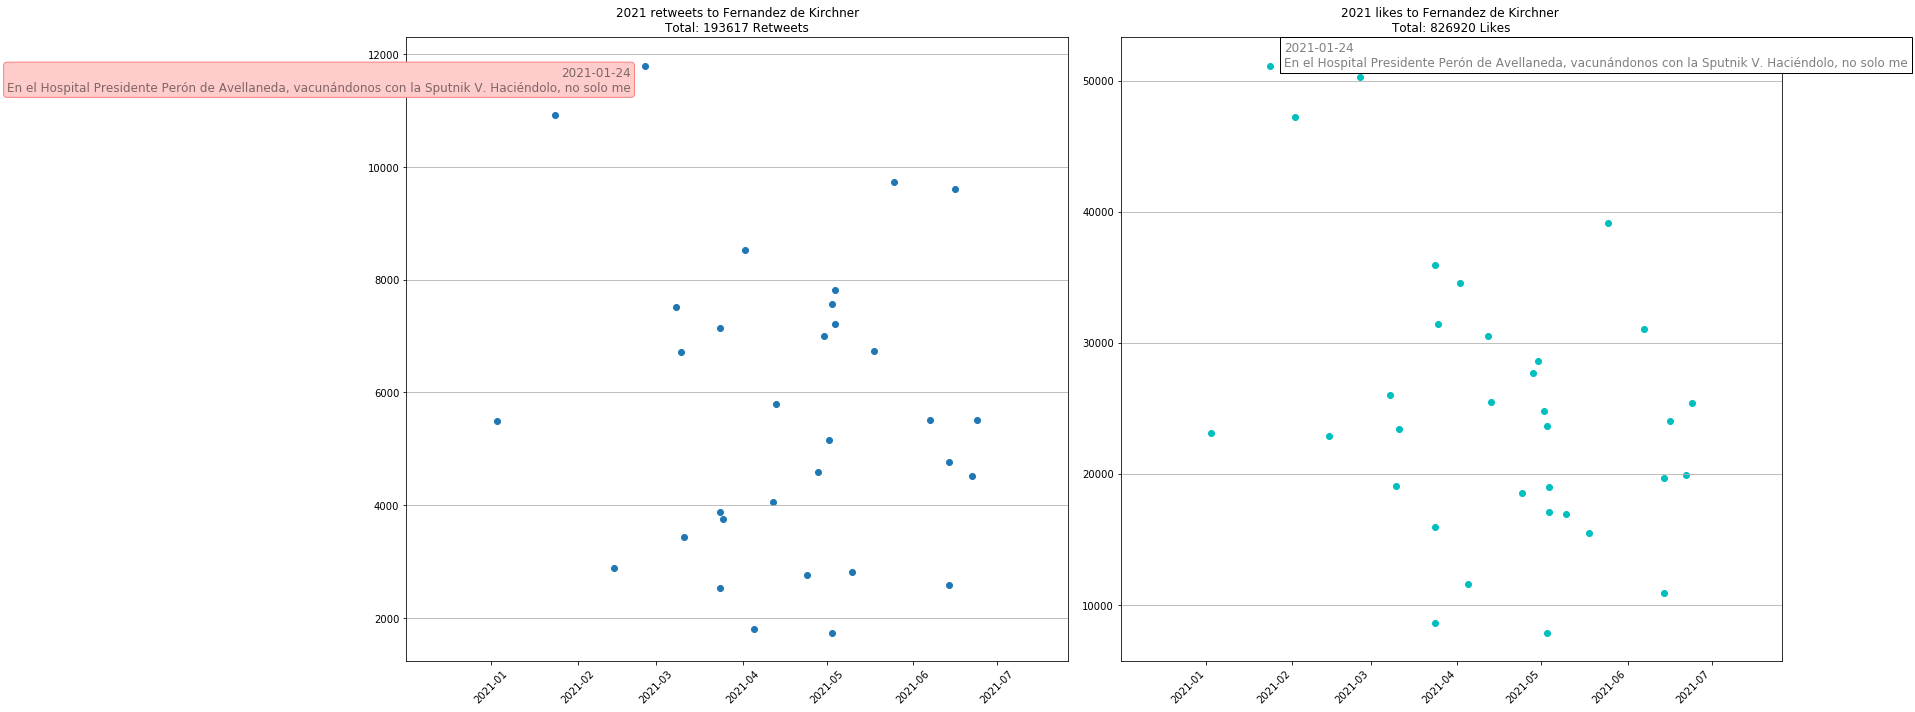

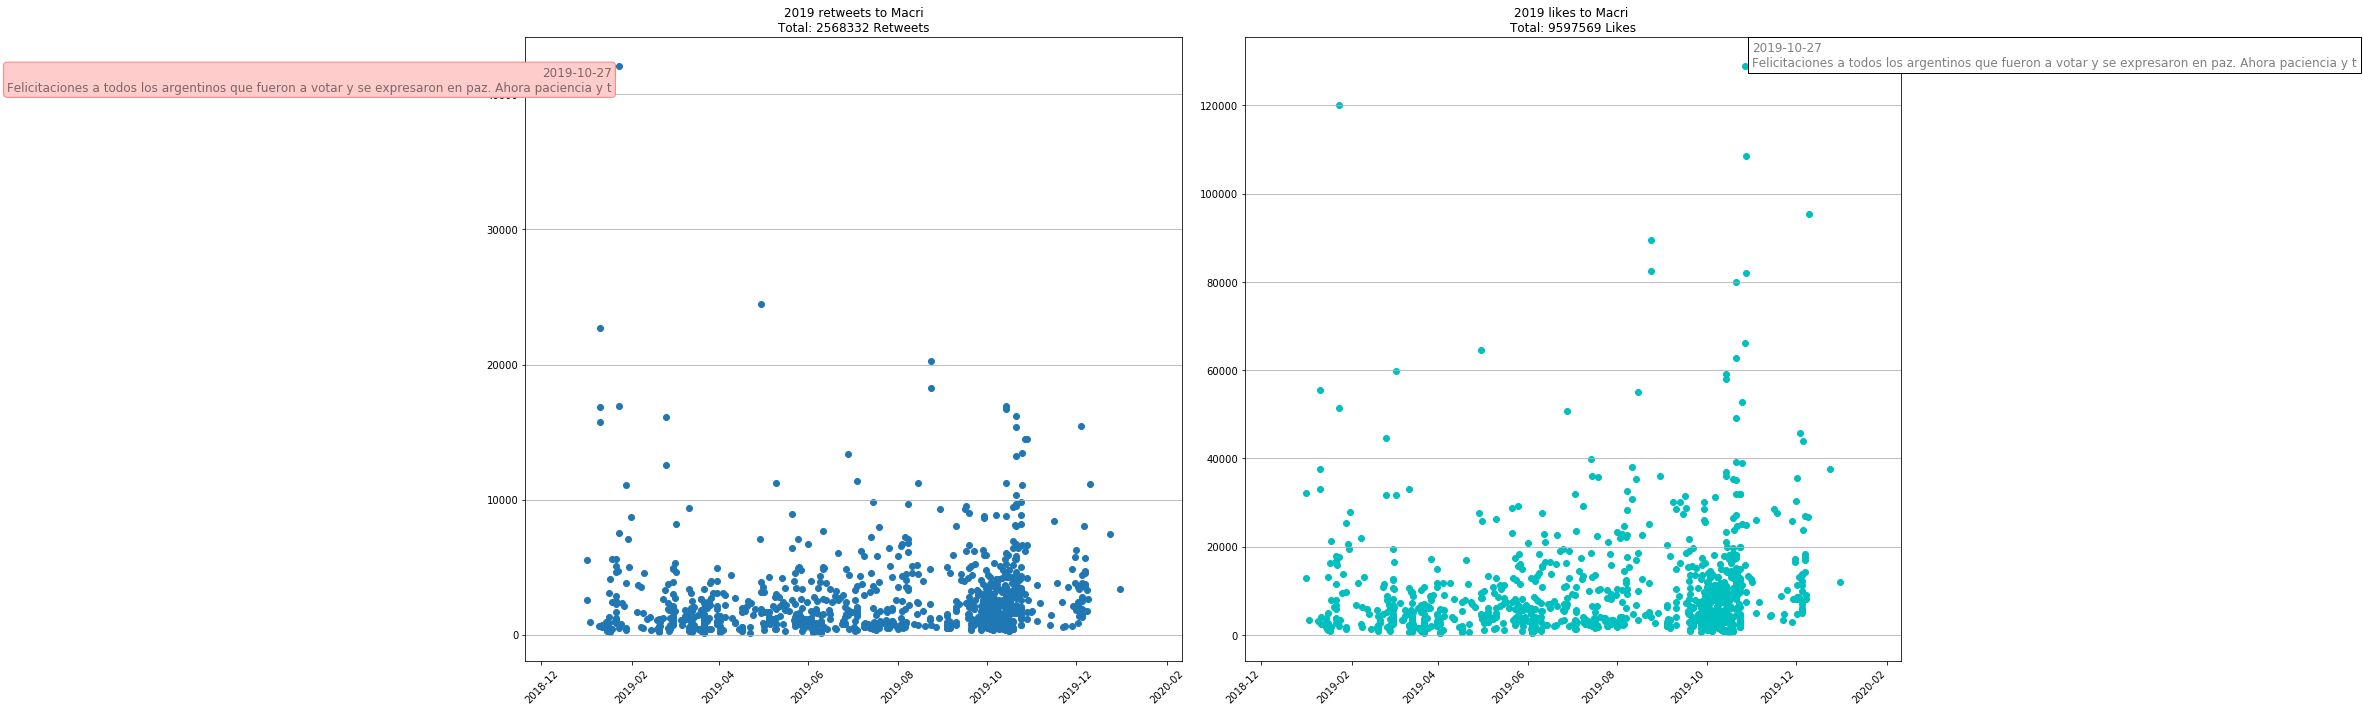

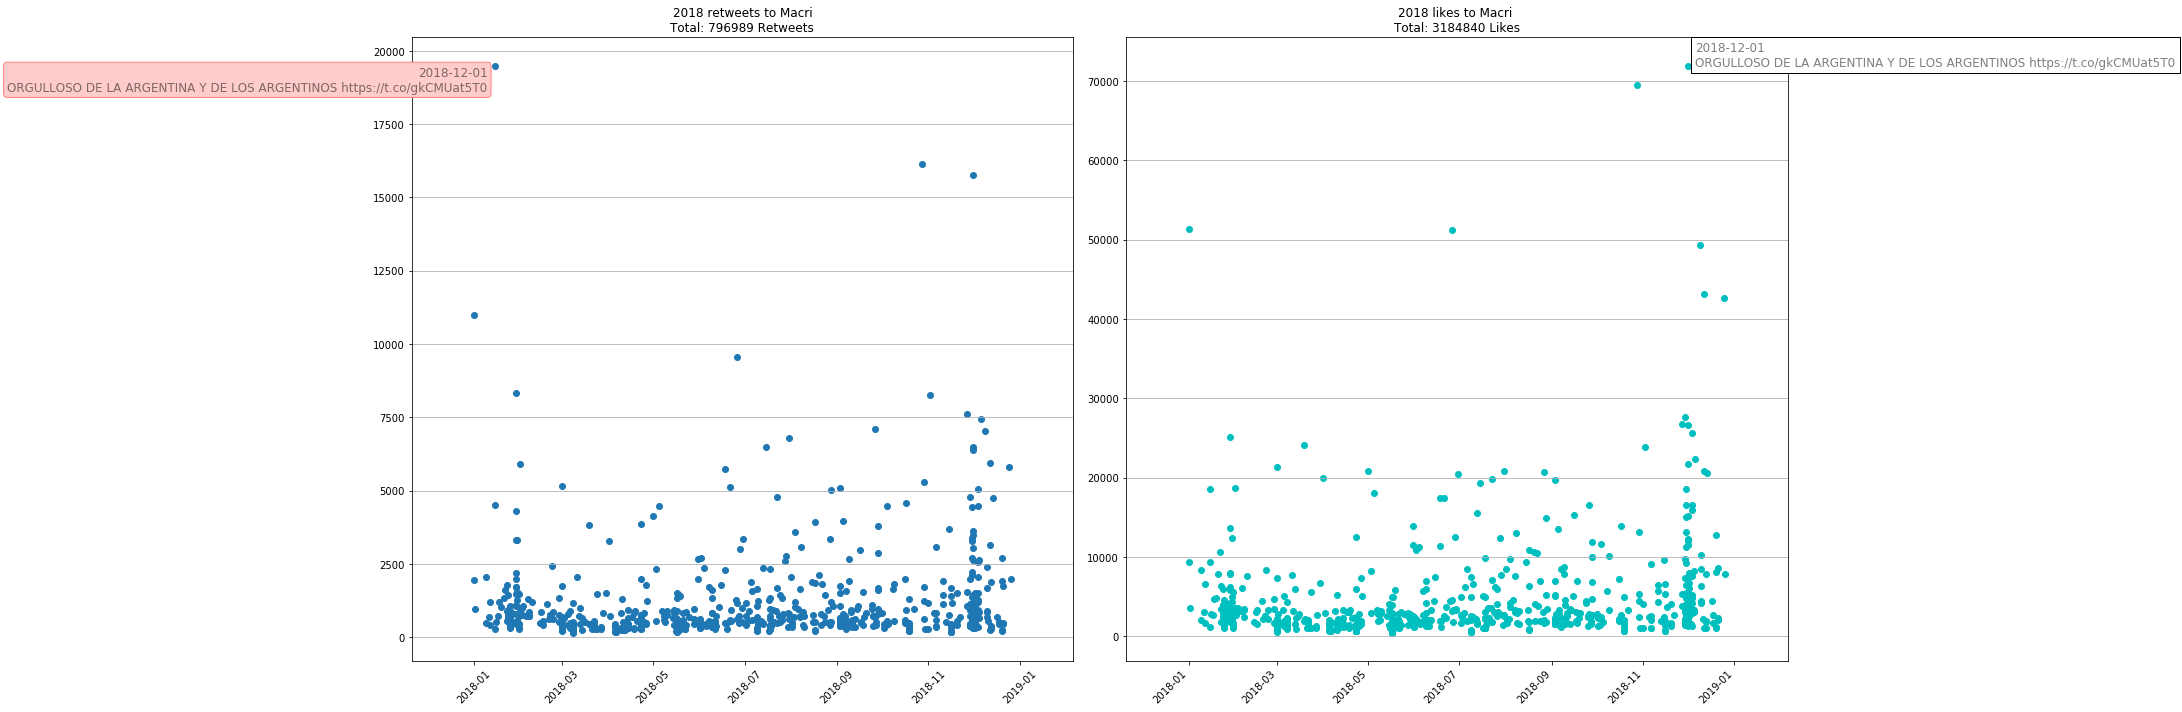

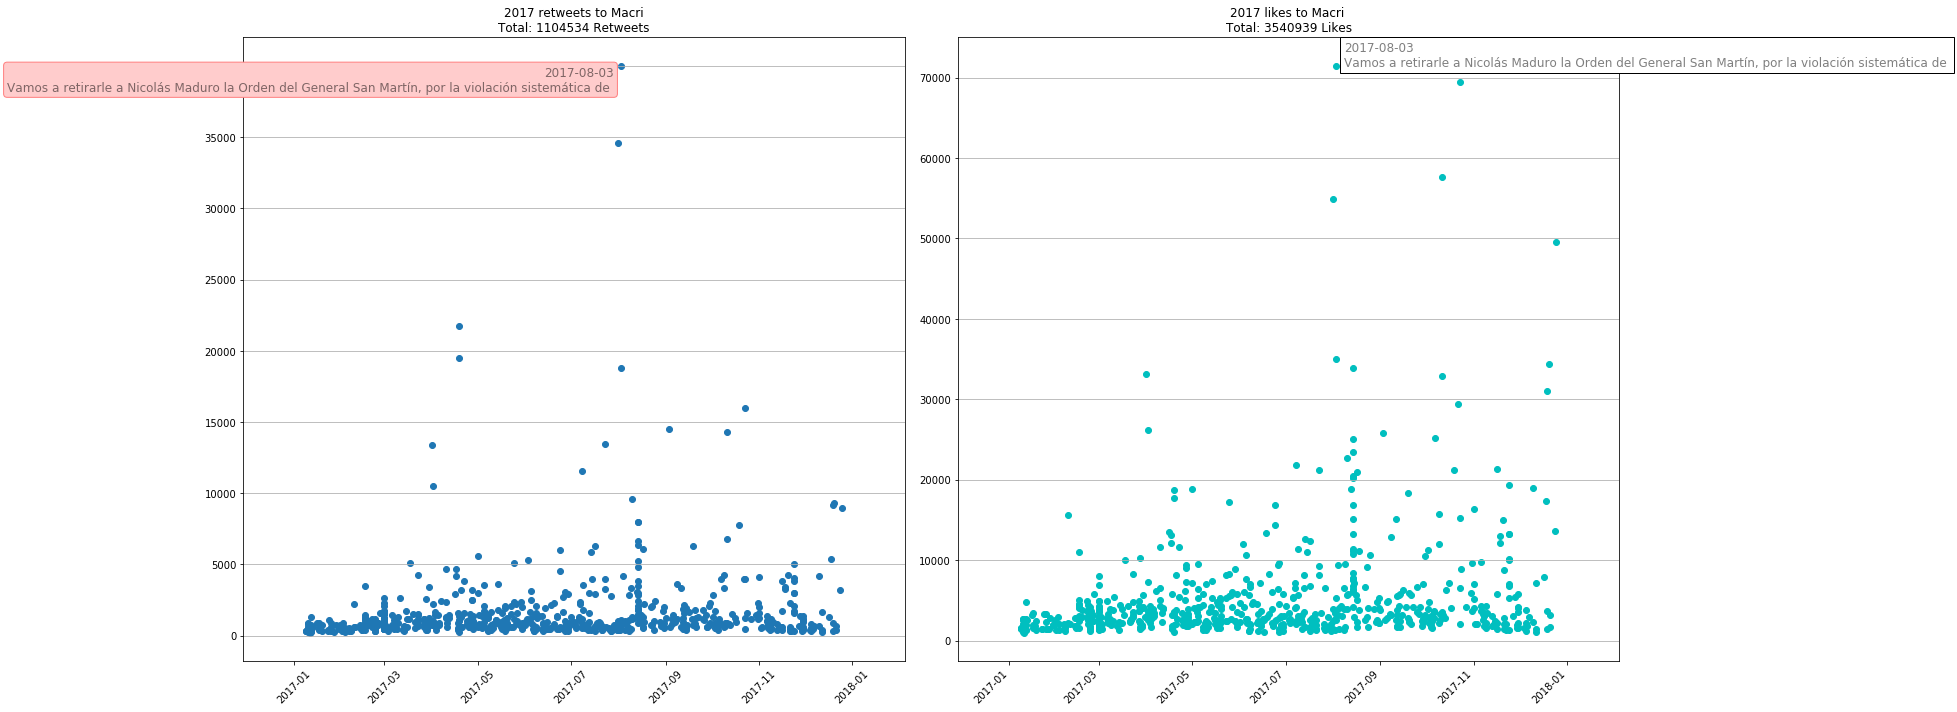

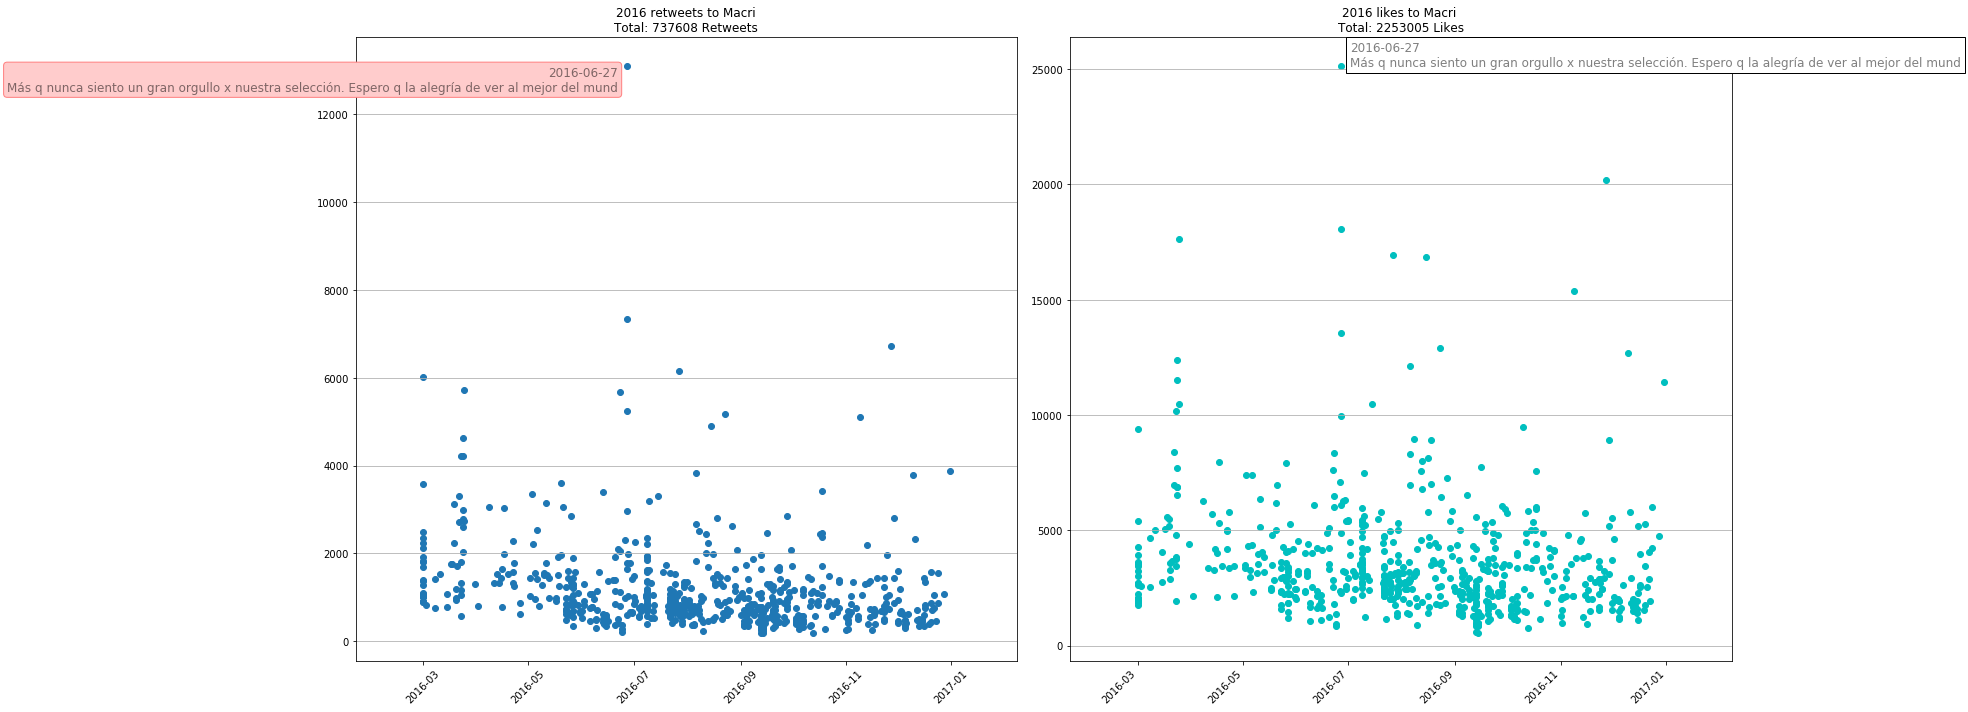

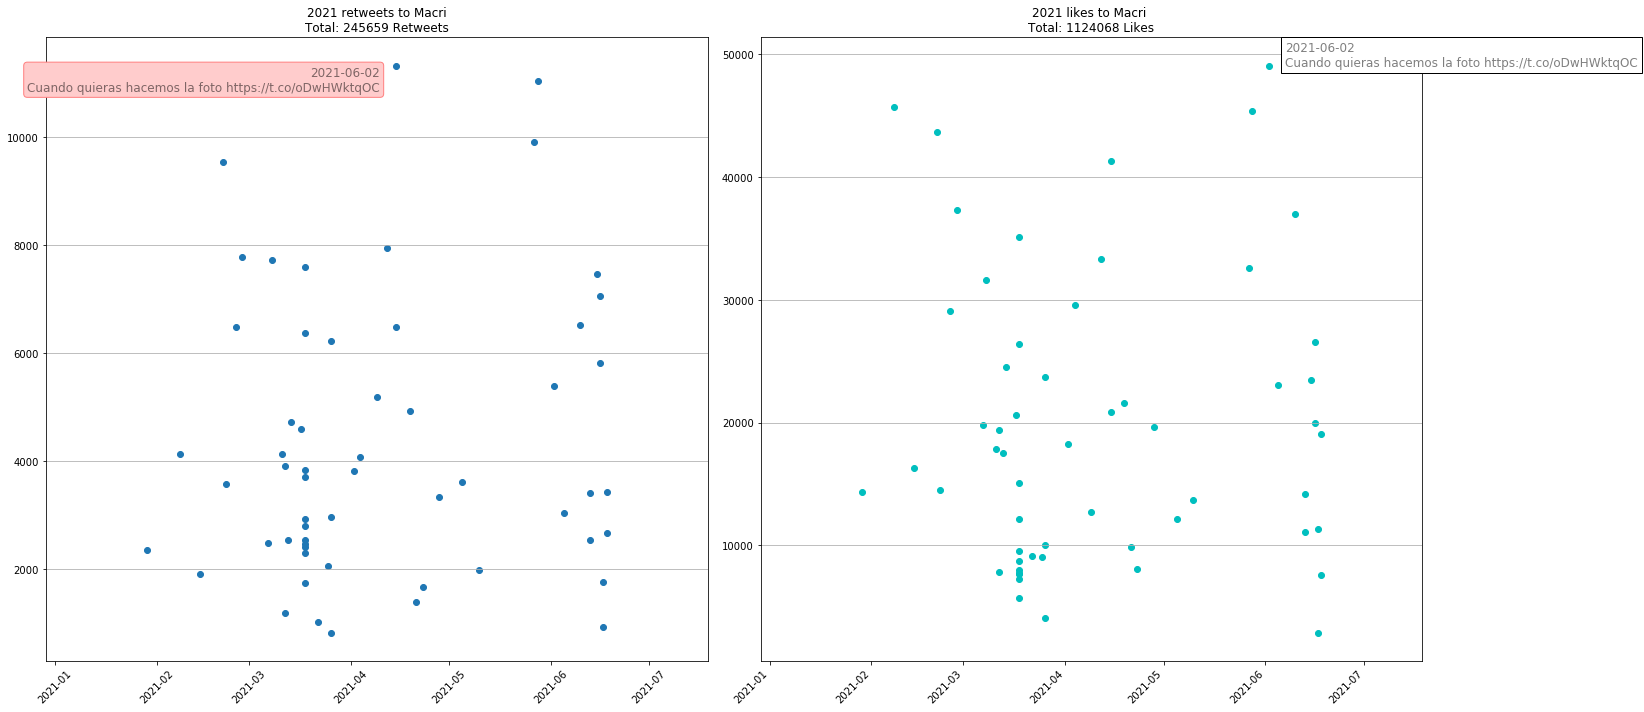

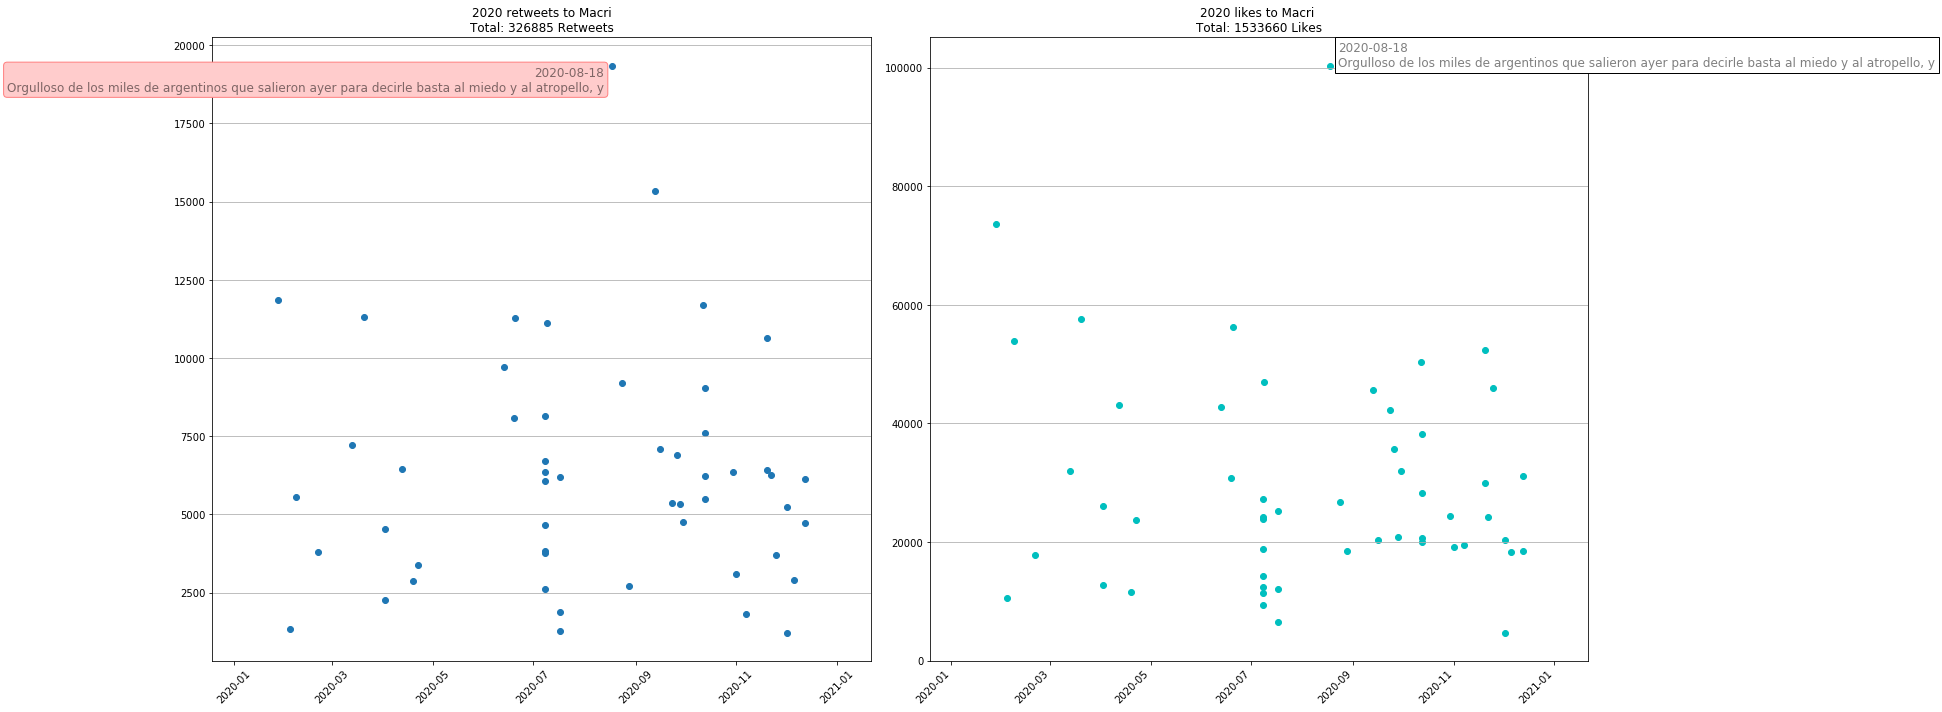

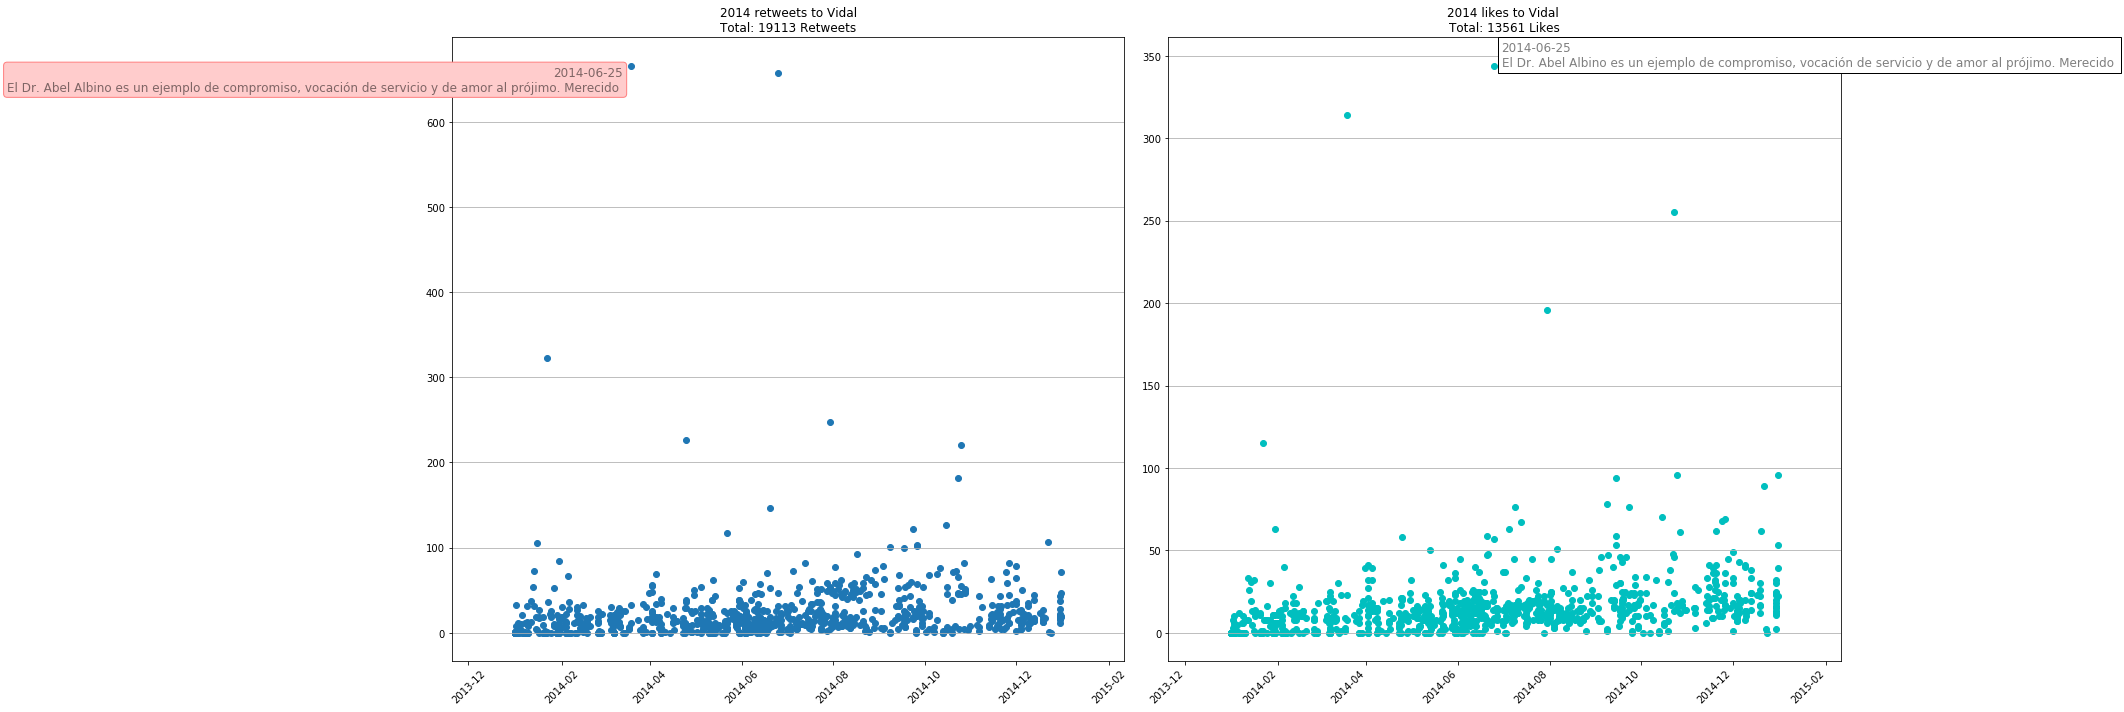

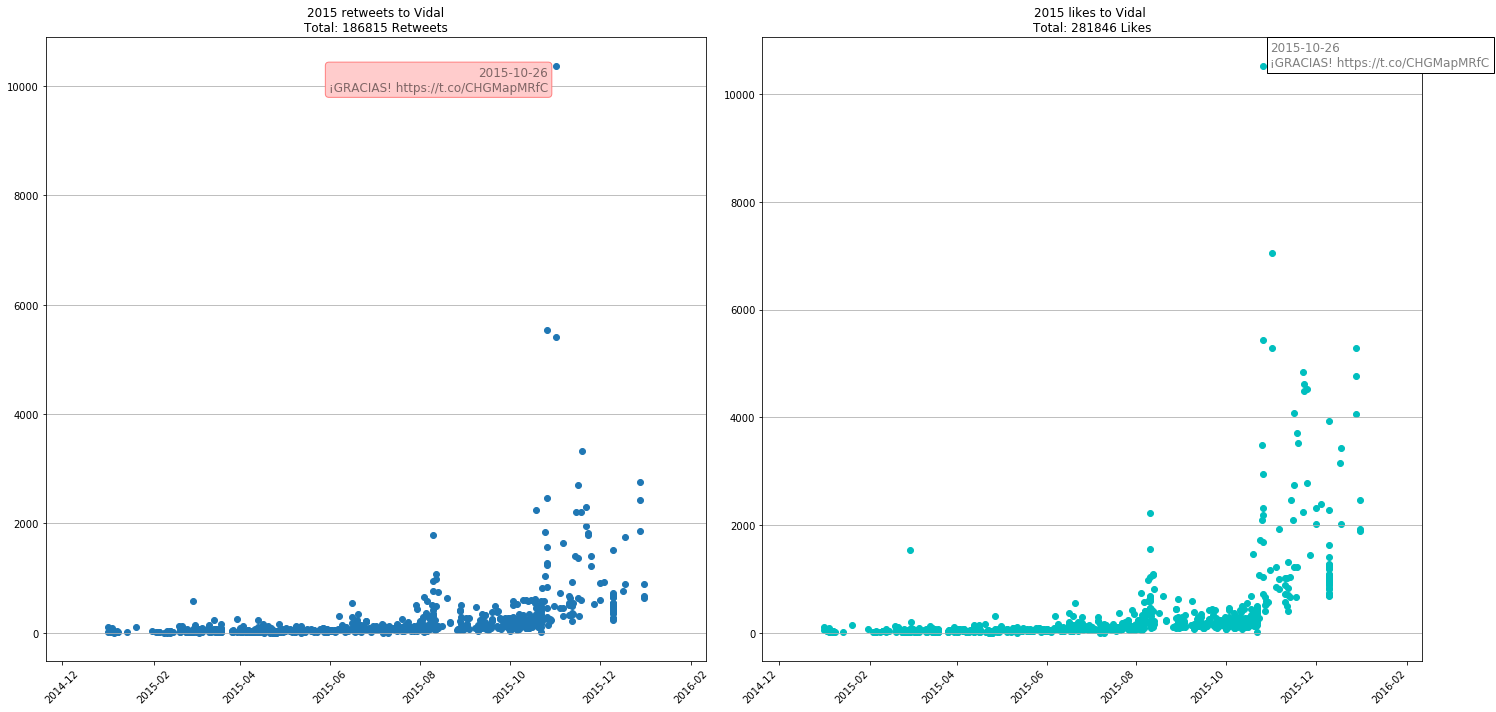

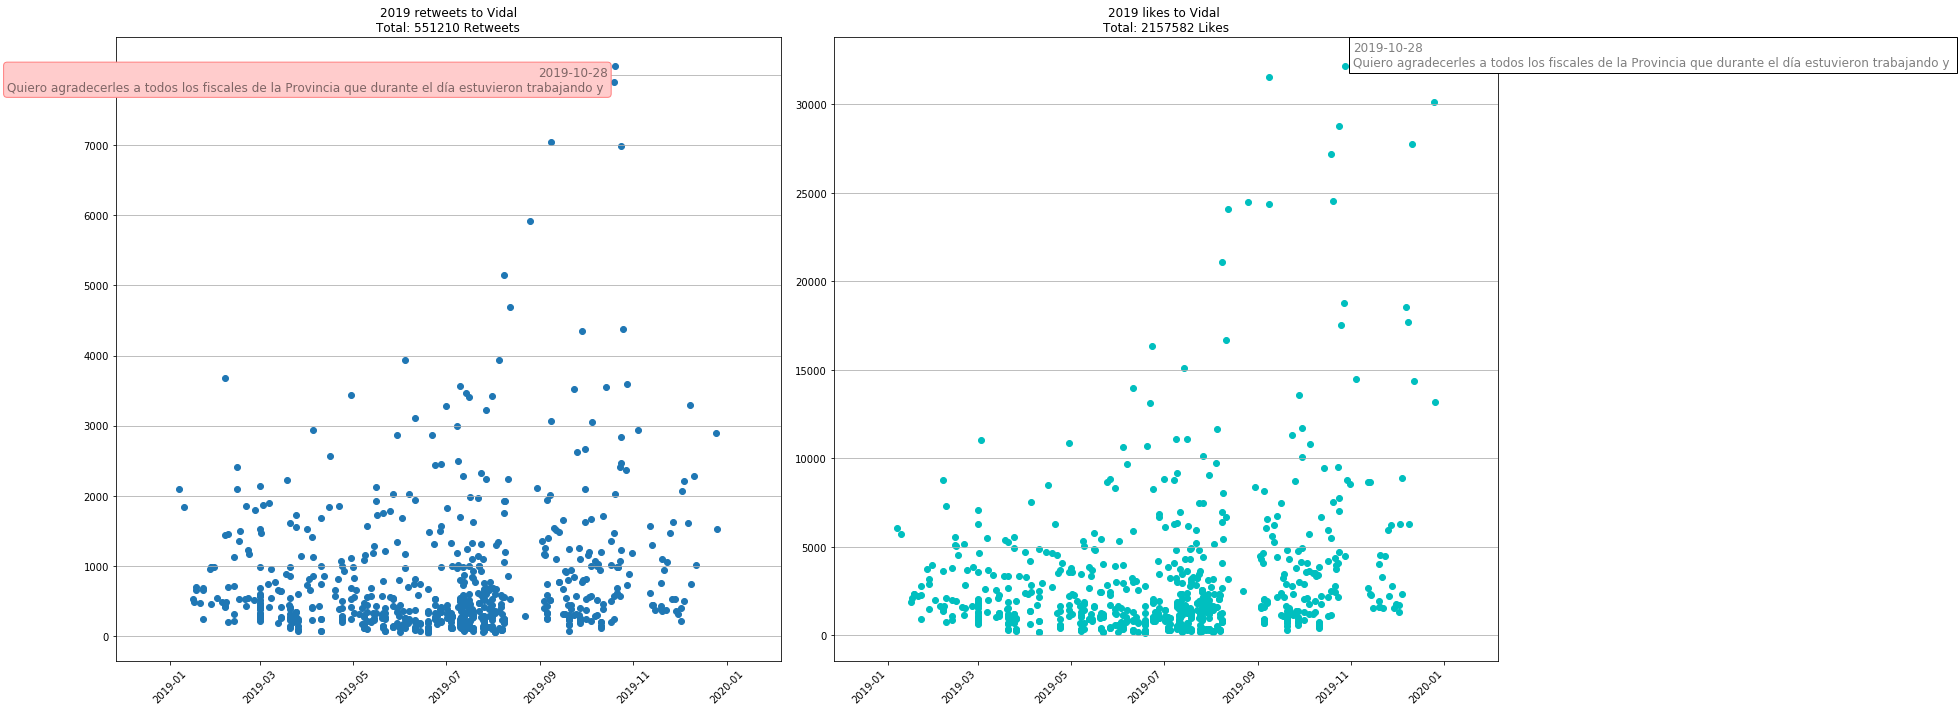

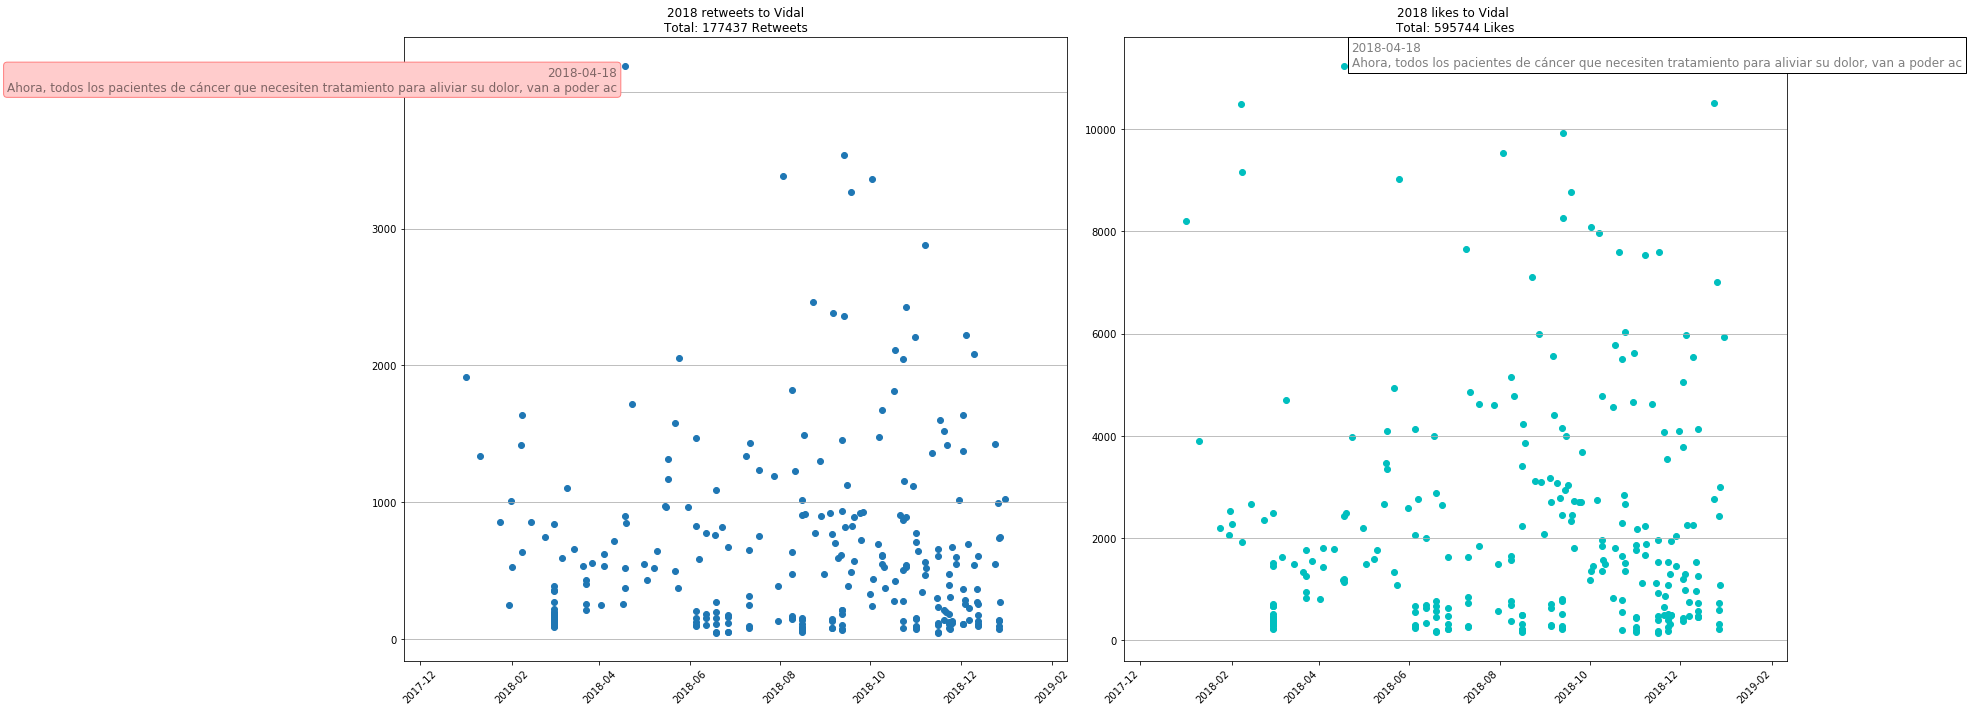

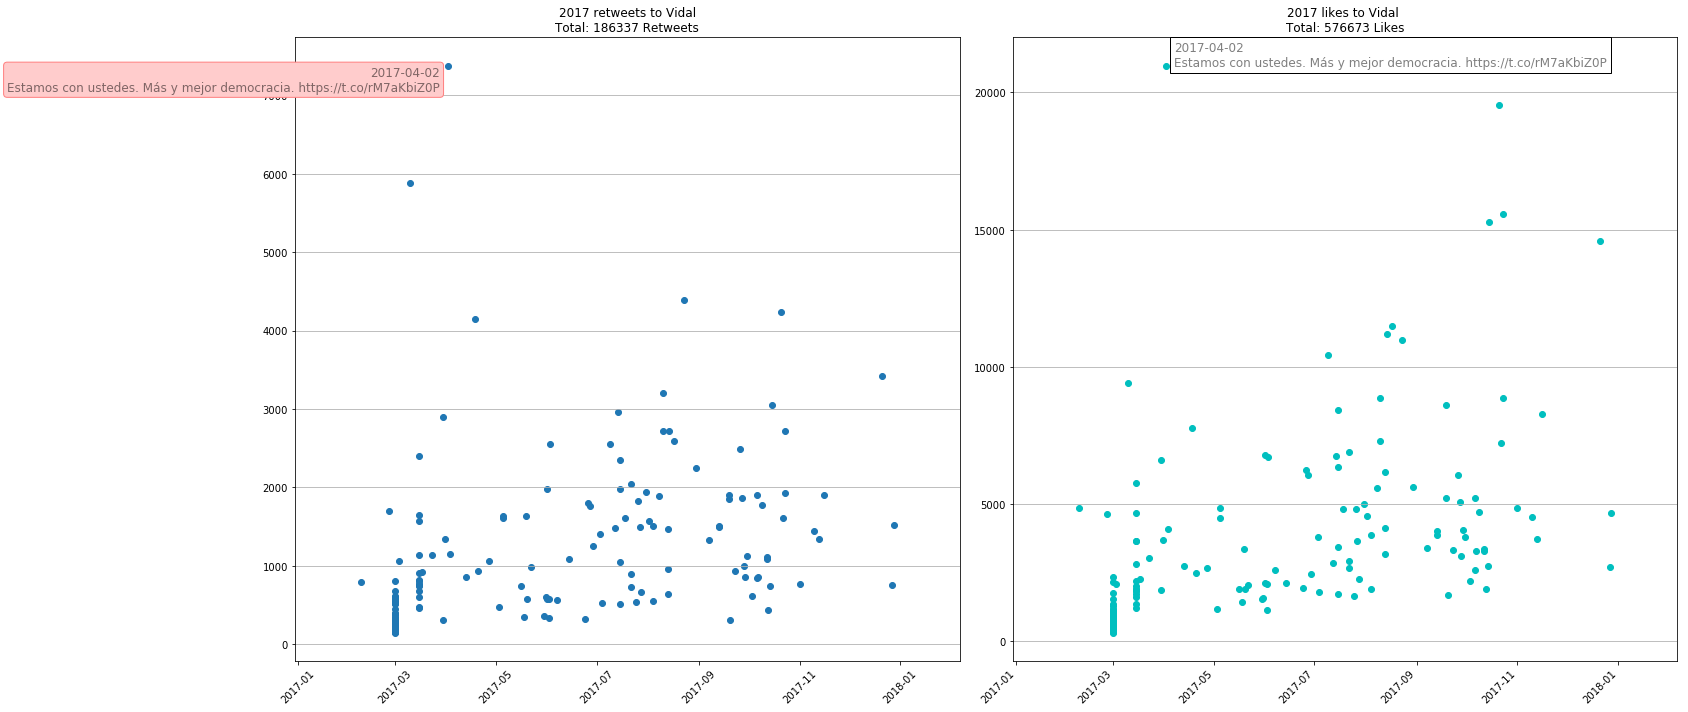

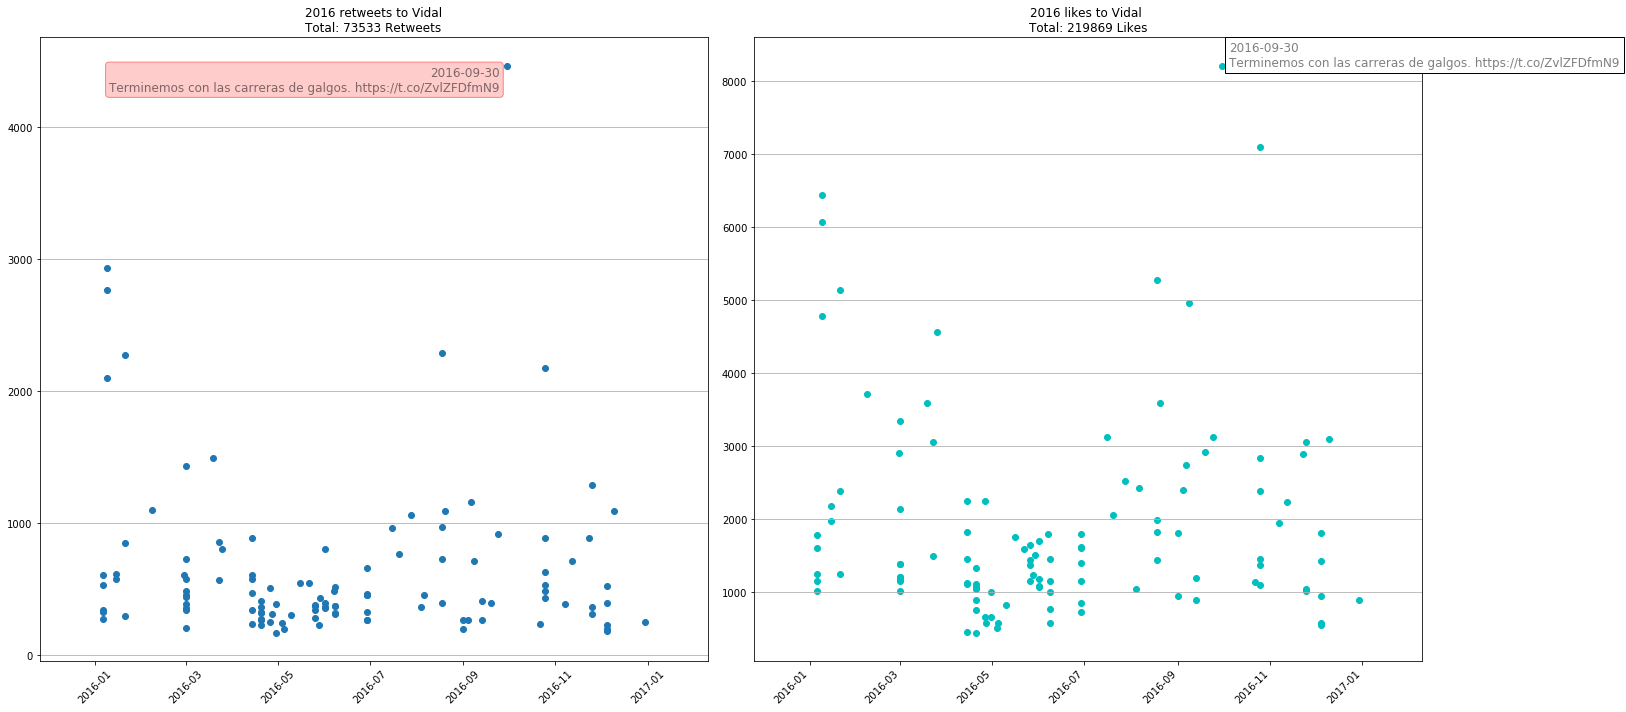

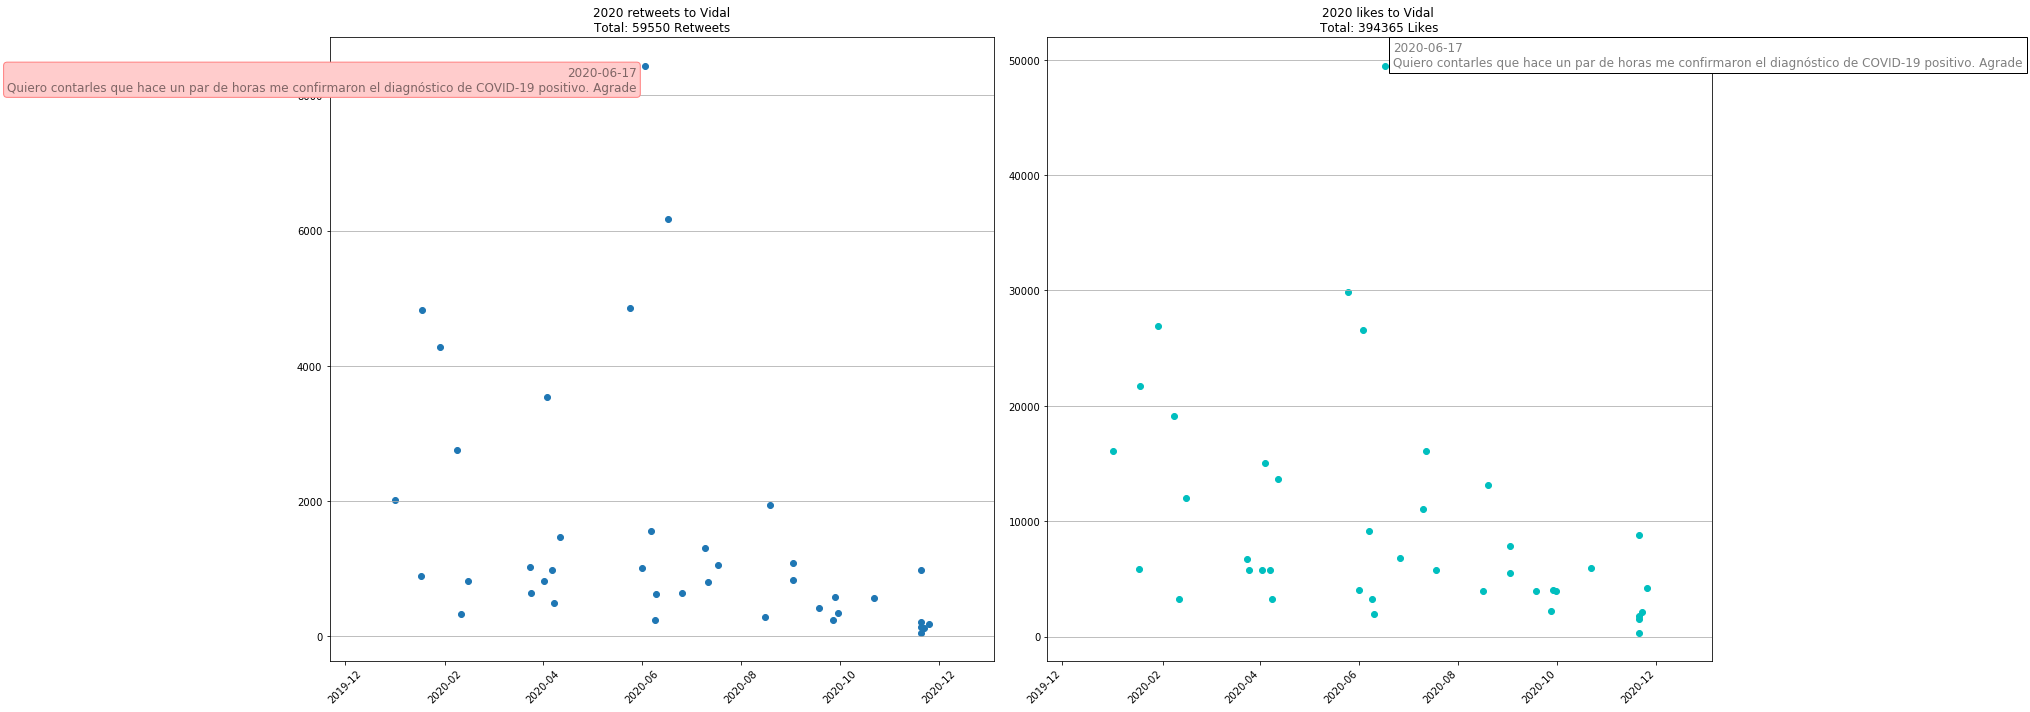

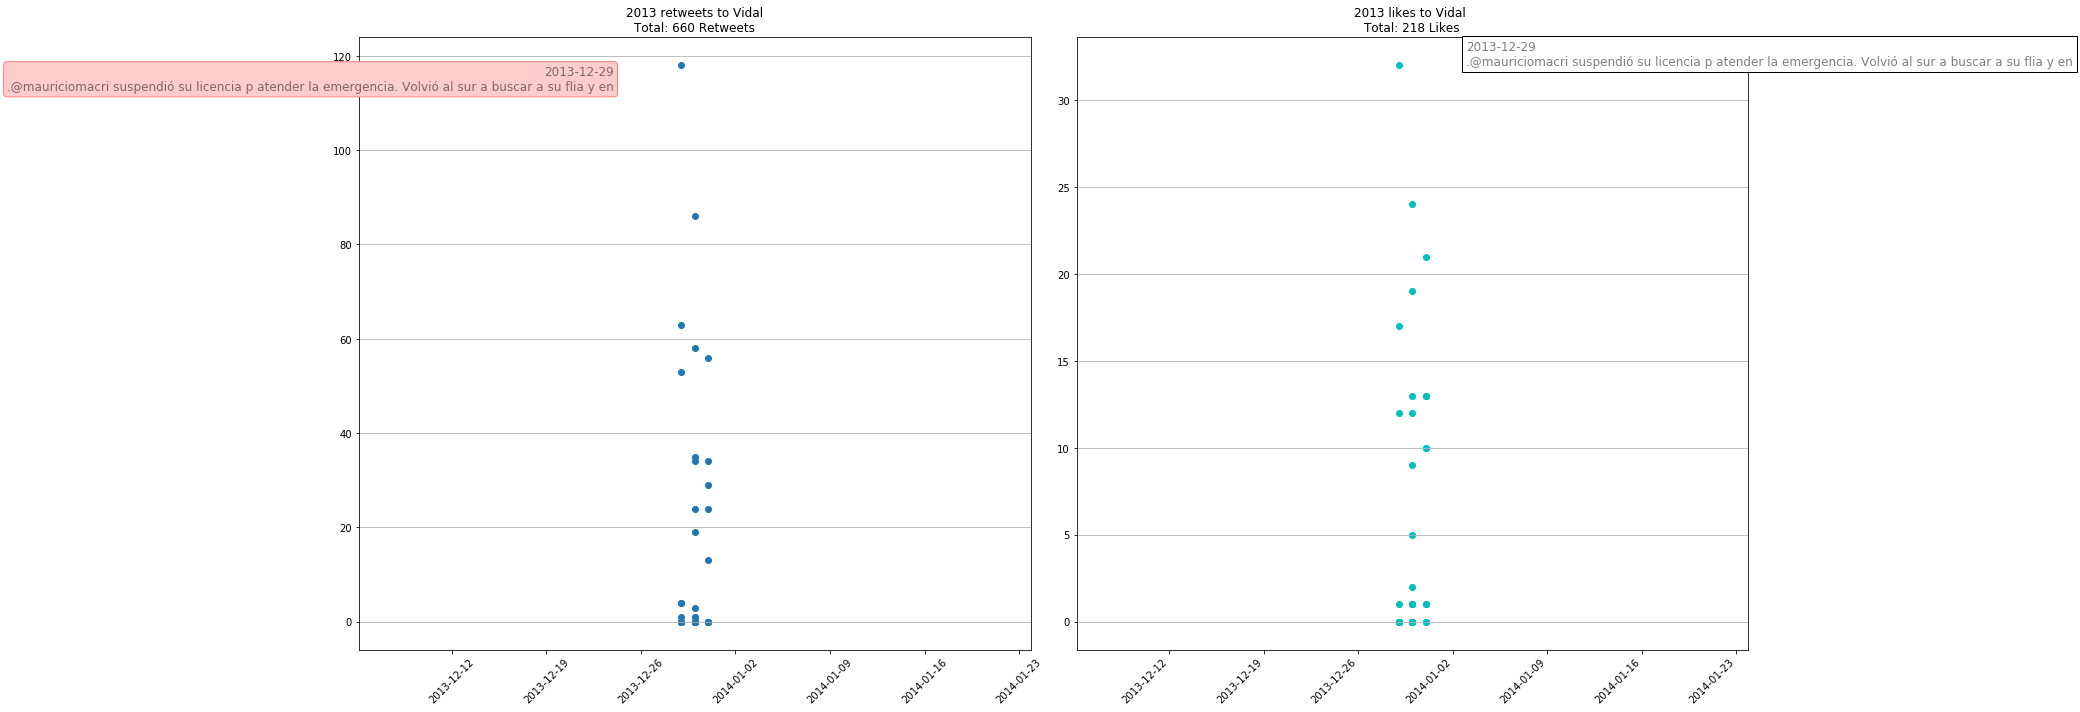

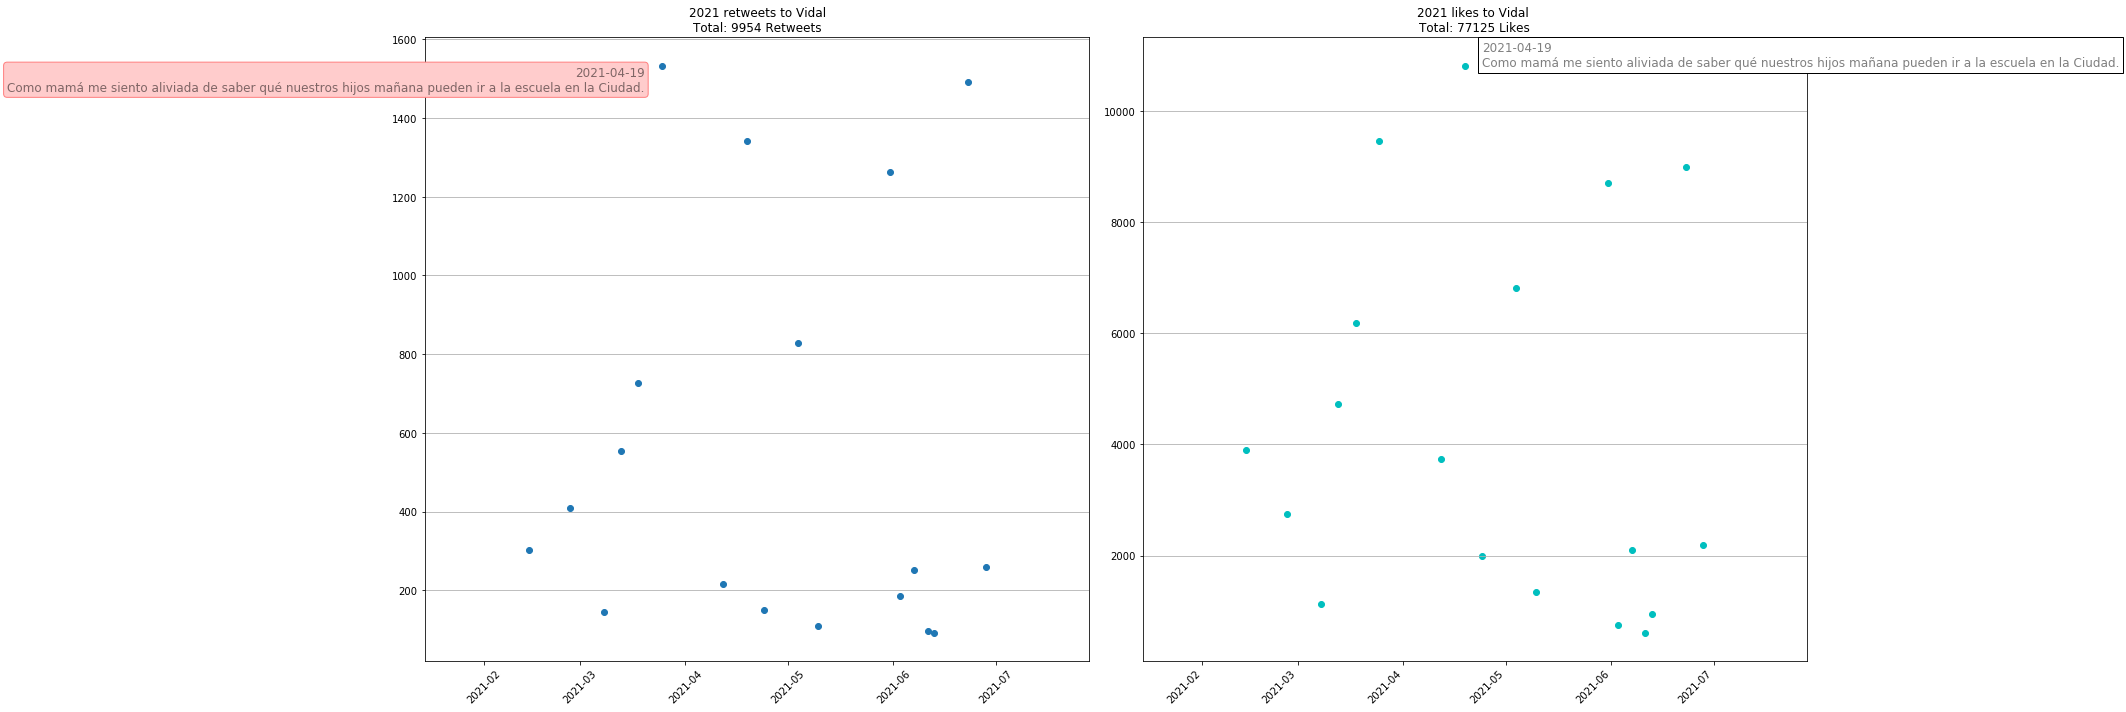

In [282]:
for df, name in zip(data, pol):
    years = pd.to_datetime(df.date).dt.year.value_counts().index.values
    for year in years:
        dates = pd.to_datetime(df.loc[df.date.str.contains(str(year)), 'date']).dt.date
        rt = df.loc[df.date.str.contains(str(year))].rt
        lk = df.loc[df.date.str.contains(str(year))].favs
        fig, ax = plt.subplots(1,2,figsize=(20, 10))
        plt.xticks(rotation=45, ha='right')
        # retweets
        ax[0].scatter(dates, rt)
        ax[0].text(dates[rt.sort_values(ascending=False).index[0]] - pd.DateOffset(5), 
                   rt[rt.sort_values(ascending=False).index[0]], 
                   f"{dates[lk.sort_values(ascending=False).index[0]]}\n{df.iloc[lk.sort_values(ascending=False).index[0]].tweet[:100]}",
                   ha='right',
                   va='top',
                   fontdict=dict(color='black', alpha=0.5, size=12),
                   bbox=dict(boxstyle="round",
                       ec=(1., 0.5, 0.5),
                       fc=(1., 0.8, 0.8),
                   ))
        ax[0].set_title(f'{year} retweets to {name}\nTotal: {rt.sum()} Retweets')
        ax[0].tick_params(axis='x', labelrotation = 45)
        ax[0].grid(axis='y')
        # likes
        ax[1].scatter(dates,lk, color='c')
        ax[1].text(dates[lk.sort_values(ascending=False).index[0]] + pd.DateOffset(5), 
                   lk[lk.sort_values(ascending=False).index[0]], 
                   f"{dates[lk.sort_values(ascending=False).index[0]]}\n{df.iloc[lk.sort_values(ascending=False).index[0]].tweet[:100]}",
                   fontdict=dict(color='black', alpha=0.5, size=12),
                   bbox=dict(facecolor='white',alpha=1))
        ax[1].set_title(f'{year} likes to {name} \nTotal: {lk.sum()} Likes')
        ax[1].tick_params(axis='x', labelrotation = 45)
        ax[1].grid(axis='y')
        fig.tight_layout()
        plt.show()

WC

In [285]:
from wordcloud import WordCloud

In [286]:
pd.to_datetime(vectors.loc['Mauricio Macri'].date).dt.year.value_counts().index.values

array([2019, 2018, 2017, 2016, 2021, 2020])

In [287]:
pd.to_datetime(vectors.loc['Cristina Kirchner'].date).dt.year.value_counts().index.values

array([2017, 2019, 2018, 2020, 2021])

In [288]:
years = list(pd.to_datetime(vectors.date).dt.year.value_counts().index.values)
people = vectors.index.value_counts().index.values
years.remove(2016)

In [289]:
years

[2017, 2019, 2018, 2020, 2021]

In [290]:
people

array(['Mauricio Macri', 'Cristina Kirchner'], dtype=object)

In [291]:
vectors.loc[(pd.to_datetime(vectors.date).dt.year == 2020) & (vectors.index == 'Mauricio Macri'), vectors.columns != 'date'].sum().sort_values(ascending=False)[:10]

argentinos    10
familia        7
quiero         6
hoy            6
presidente     5
justicia       5
país           5
amigos         5
unidos         4
futuro         4
dtype: int64

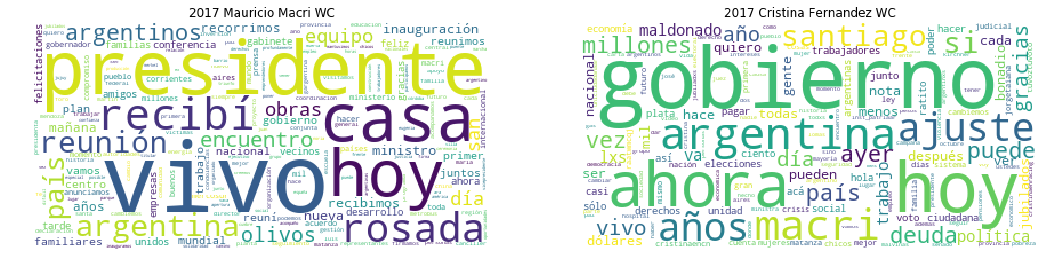

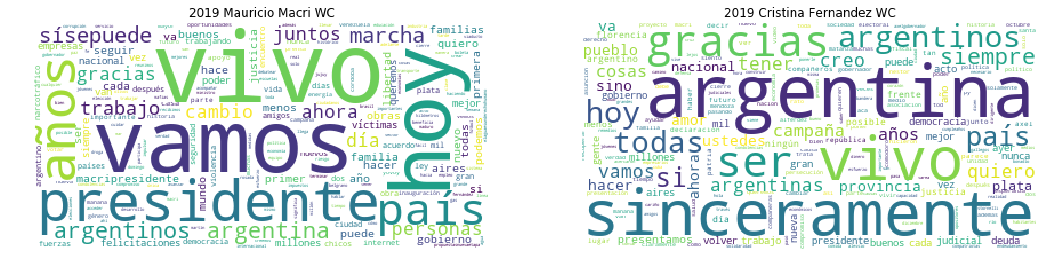

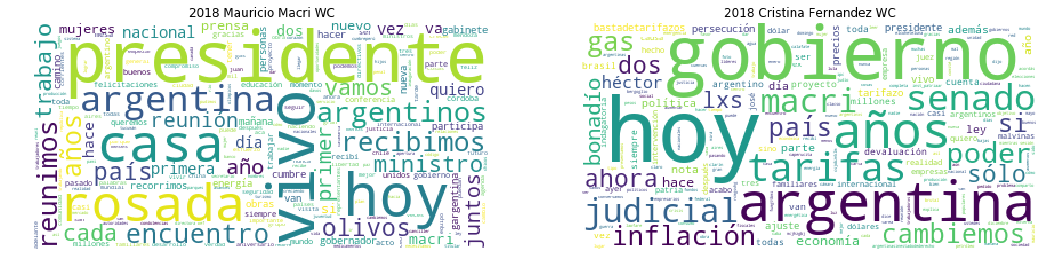

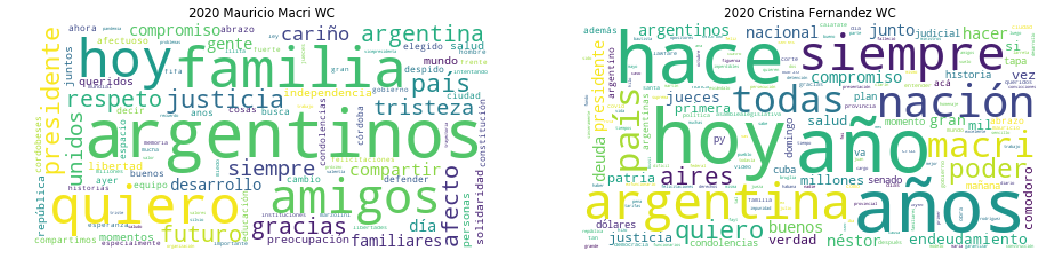

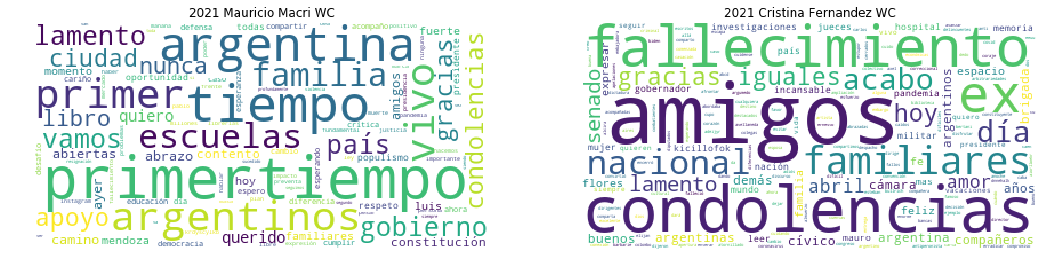

In [292]:
plt.rcParams['figure.figsize'] = [18 , 20]
for year in years:
    cloud = WordCloud(background_color='white')
    mm_tweets = vectors.loc[(pd.to_datetime(vectors.date).dt.year == year) & (vectors.index == 'Mauricio Macri'), vectors.columns != 'date']
    cfk_tweets = vectors.loc[(pd.to_datetime(vectors.date).dt.year == year) & (vectors.index == 'Cristina Kirchner'), vectors.columns != 'date']
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(cloud.generate_from_frequencies(mm_tweets.sum()))
    ax2.imshow(cloud.generate_from_frequencies(cfk_tweets.sum()))
    ax1.axis('off')
    ax2.axis('off')
    ax1.set_title(f'{year} Mauricio Macri WC')
    ax2.set_title(f'{year} Cristina Fernandez WC')
    plt.show()